<a href="https://colab.research.google.com/github/Sofia-Angel-Carlon/deeplearning/blob/main/Ejercicio%20RegularizadoresSOFIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Descarga los datos de MNIST

In [3]:
print(train_images.shape)

(60000, 28, 28)


In [4]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)
train_images = train_images.astype('float32') / 255
# Imagenes y etiquetas de test.
# test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
validation_images=train_images[50000:]  
train_images=train_images[:49999]      

validation_labels=train_labels[50000:]
train_labels=train_labels[:49999]

print(validation_images.shape)
print(validation_labels.shape)

(10000, 784)
(10000,)


In [6]:
def crea_modelo(regularizador):
  modelo = models.Sequential()
  if(regularizador==0):
    modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
  elif(regularizador==1):
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28*28,)))
  elif(regularizador==2):
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28*28,)))
  elif(regularizador==3):
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(28*28,)))
  elif(regularizador==4):
    modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    modelo.add(layers.Dropout(0.5))
  else:
    print("Error")
  
  modelo.add(layers.Dense(10, activation='softmax'))
  modelo.summary()
  return modelo

  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

In [7]:
def compila_modelo(modelo): 
  modelo.compile(optimizer='rmsprop', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='sparse_categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión
  return modelo 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo

In [8]:
def entrena_modelo(modelo):
  history = modelo.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=30, batch_size=128)
  return history

  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history

In [9]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [10]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [11]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
network0 = compila_modelo(network0)

In [13]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 3s 6ms/step - loss: 0.2820 - accuracy: 0.9174 - val_loss: 0.1566 - val_accuracy: 0.9541
Epoch 2/30
391/391 [==============================] - 2s 6ms/step - loss: 0.1164 - accuracy: 0.9650 - val_loss: 0.1032 - val_accuracy: 0.9712
Epoch 3/30
391/391 [==============================] - 2s 5ms/step - loss: 0.0764 - accuracy: 0.9773 - val_loss: 0.0862 - val_accuracy: 0.9758
Epoch 4/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0547 - accuracy: 0.9835 - val_loss: 0.0818 - val_accuracy: 0.9758
Epoch 5/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0408 - accuracy: 0.9881 - val_loss: 0.0883 - val_accuracy: 0.9762
Epoch 6/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0312 - accuracy: 0.9908 - val_loss: 0.0792 - val_accuracy: 0.9787
Epoch 7/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0231 - accuracy: 0.9933 - val_loss: 0.0804 - val_accuracy: 0.9792
Epoch 

### Caso 1: Con regularizador l1

In [14]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
network1 = compila_modelo(network1)

In [16]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1304 - accuracy: 0.8443 - val_loss: 1.0905 - val_accuracy: 0.8521
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9692 - accuracy: 0.8787 - val_loss: 0.9589 - val_accuracy: 0.8777
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8465 - accuracy: 0.8980 - val_loss: 0.8240 - val_accuracy: 0.9095
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7694 - accuracy: 0.9130 - val_loss: 0.7282 - val_accuracy: 0.9229
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7225 - accuracy: 0.9211 - val_loss: 0.6690 - val_accuracy: 0.9375
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6833 - accuracy: 0.9282 - val_loss: 0.6340 - val_accuracy: 0.9470
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6543 - accuracy: 0.9338 - val_loss: 0.6349 - val_accuracy: 0.9385
Epoch 

### Caso 2: Con regularizador l2

In [17]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
network2 = compila_modelo(network2)

In [19]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5281 - accuracy: 0.9112 - val_loss: 0.3815 - val_accuracy: 0.9246
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2651 - accuracy: 0.9534 - val_loss: 0.2208 - val_accuracy: 0.9627
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2118 - accuracy: 0.9624 - val_loss: 0.2073 - val_accuracy: 0.9615
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1867 - accuracy: 0.9673 - val_loss: 0.1816 - val_accuracy: 0.9676
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1748 - accuracy: 0.9695 - val_loss: 0.1691 - val_accuracy: 0.9719
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1644 - accuracy: 0.9718 - val_loss: 0.1826 - val_accuracy: 0.9670
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1586 - accuracy: 0.9728 - val_loss: 0.1743 - val_accuracy: 0.9704
Epoch 

### Caso 3: Con regularizador l1_l2

In [20]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
network3 = compila_modelo(network3)

In [22]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1433 - accuracy: 0.8421 - val_loss: 1.0044 - val_accuracy: 0.8895
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9838 - accuracy: 0.8754 - val_loss: 0.9341 - val_accuracy: 0.8777
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8660 - accuracy: 0.8968 - val_loss: 0.7828 - val_accuracy: 0.9170
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7889 - accuracy: 0.9112 - val_loss: 0.7456 - val_accuracy: 0.9254
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7381 - accuracy: 0.9191 - val_loss: 0.6847 - val_accuracy: 0.9320
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7023 - accuracy: 0.9262 - val_loss: 0.6997 - val_accuracy: 0.9316
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6714 - accuracy: 0.9310 - val_loss: 0.6428 - val_accuracy: 0.9401
Epoch 

### Caso 4: Con Droput

In [23]:
network4 = crea_modelo(4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
network4 = compila_modelo(network4)

In [25]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3423 - accuracy: 0.8990 - val_loss: 0.1530 - val_accuracy: 0.9574
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1673 - accuracy: 0.9504 - val_loss: 0.1179 - val_accuracy: 0.9661
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1278 - accuracy: 0.9619 - val_loss: 0.0976 - val_accuracy: 0.9708
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.9686 - val_loss: 0.0891 - val_accuracy: 0.9724
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0941 - accuracy: 0.9717 - val_loss: 0.0859 - val_accuracy: 0.9766
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9757 - val_loss: 0.0848 - val_accuracy: 0.9764
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0761 - accuracy: 0.9775 - val_loss: 0.0791 - val_accuracy: 0.9780
Epoch 

### Caso 5: Error de código de regularizador

In [26]:
network5 = crea_modelo(5)

Error


ValueError: ignored

###GRÁFICAS

In [1]:
pinta_perdida_entrenamiento_validacion(historia0)
pinta_perdida_entrenamiento_validacion(historia1)
pinta_perdida_entrenamiento_validacion(historia2)
pinta_perdida_entrenamiento_validacion(historia3)
pinta_perdida_entrenamiento_validacion(historia4)

NameError: ignored

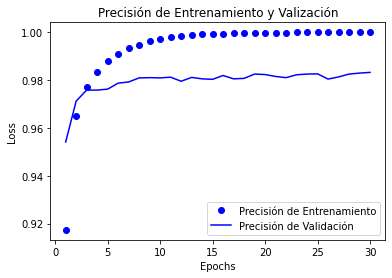

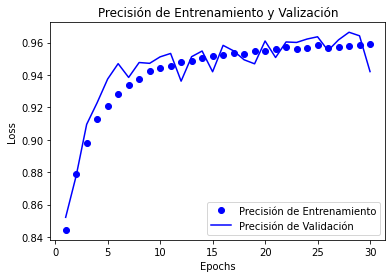

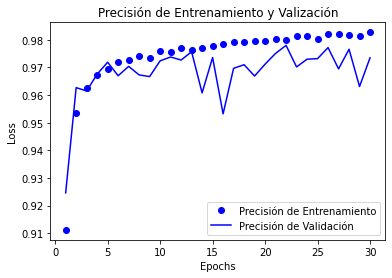

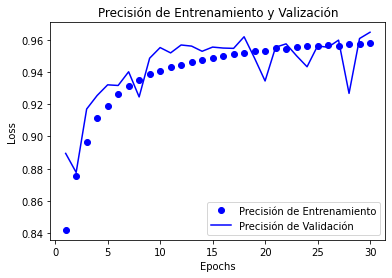

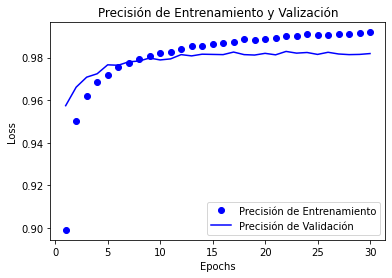

In [28]:
pinta_precision_entrenamiento_validacion(historia0)
pinta_precision_entrenamiento_validacion(historia1)
pinta_precision_entrenamiento_validacion(historia2)
pinta_precision_entrenamiento_validacion(historia3)
pinta_precision_entrenamiento_validacion(historia4)

### CONCLUSIONES

Todos los modelos obtienen una precisión entorno al 96%, en cuánto a las pérdidas si hay diferencias entre unos modelos. Entonces, el modelo que mejor resulta en este caso es el cuarto con regularizador dropout, es en el que obtenemos la mayor precisión, consiguiendo un 99%. El segundo mejor, es el tercer modelo con el regularizador L2 consiguiendo un 10% de pérdida y 98% de precisión y le sigue